In [33]:
import pandas as pd #The core of dataframe
import numpy as np #For random dummy data
import matplotlib.pyplot as plt #For creating chart
import matplotlib.patches as mpatches  # Import for creating custom legend elements

In [2]:
# Set random seed for reproducibility
np.random.seed(10)

# Create a date range for January and February 2024
dates = pd.date_range(start='2024-01-01', end='2024-02-29', freq='D')

# Generate random conversion rates within the specified range
conversion_rates = np.random.uniform(0.5, 0.7, size=len(dates))

# Create the DataFrame
df = pd.DataFrame({'date': dates, 'conversion_rate': conversion_rates})

# Display the data
df.head()

,date,conversion_rate
0,2024-01-01,0.654264
1,2024-01-02,0.504150
2,2024-01-03,0.626730
3,2024-01-04,0.649761
4,2024-01-05,0.599701
5,2024-01-06,0.544959
6,2024-01-07,0.539613
7,2024-01-08,0.652106
8,2024-01-09,0.533822
9,2024-01-10,0.517668


In [15]:
#set public and joint holiday in Indonesia
holidays = [
    {'date': '2024-01-01', 'name': 'New Year', 'type': 'public'},
    {'date': '2024-02-08', 'name': "Isra Mi'raj Nabi Muhammad SAW", 'type': 'public'},
    {'date': '2024-02-09', 'name': 'Cuti Bersama Tahun Baru Imlek', 'type': 'joint'},
    {'date': '2024-02-10', 'name': 'Tahun Baru Imlek 2575 Kongzili', 'type': 'public'},
    {'date': '2024-02-11', 'name': 'Hari Suci Nyepi Tahun Baru Saka 1946', 'type': 'public'},
    {'date': '2024-02-12', 'name': 'Cuti Bersama Hari Suci Nyepi Tahun Baru Saka 1946', 'type': 'joint'},
    {'date': '2024-02-14', 'name': 'Pemilu Presiden', 'type': 'public'}
]
holidays = pd.DataFrame(holidays)
holidays['date'] = pd.to_datetime(holidays['date'])

In [20]:
# Function to determine color
def get_color(date):
    if date in holidays['date'].to_list():
        return 'orange'
    elif date.dayofweek >= 5:  # Weekend (Saturday = 5, Sunday = 6)
        return 'green'
    else:
        return 'blue'

# Joint Chart

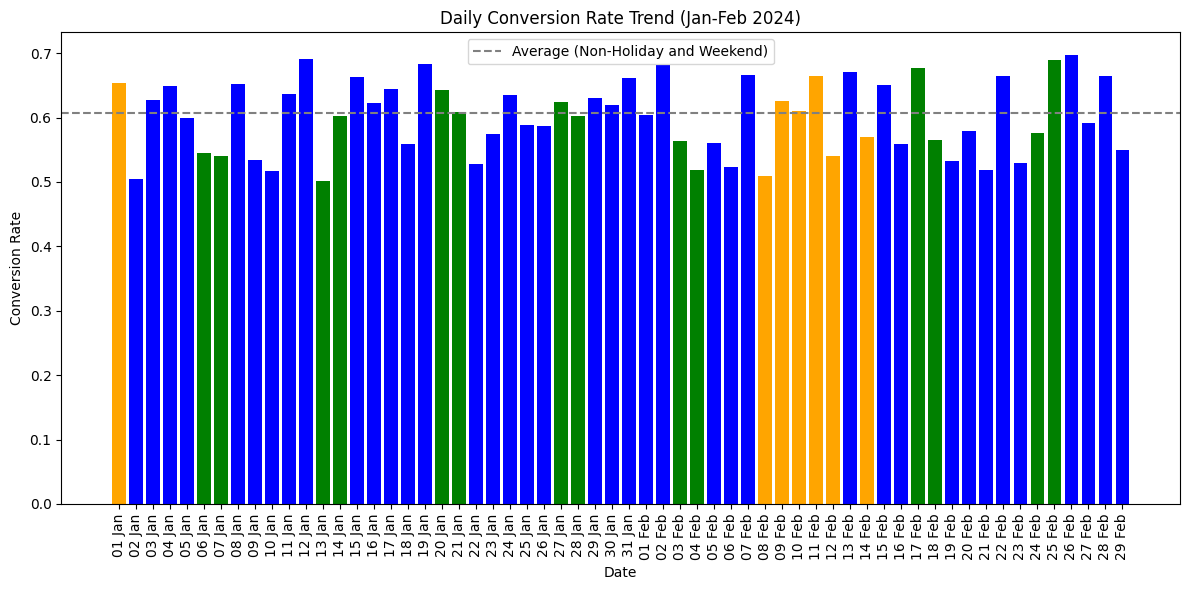

In [22]:
# -------------------  Plotting -------------------
# Get colors for each bar
colors = df['date'].apply(get_color)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(df['date'], df['conversion_rate'], color=colors)

# Calculate average conversion rate for non-holiday weekdays
avg_conversion_rate = df[~df['date'].isin(holidays['date']) & (df['date'].dt.dayofweek < 5)]['conversion_rate'].mean()

# Add horizontal line
plt.axhline(y=avg_conversion_rate, color='gray', linestyle='--', label='Average (Non-Holiday and Weekend)')

# Add a legend
plt.legend()


# Customize appearance
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rate Trend (Jan-Feb 2024)')

# Customize x-axis labels
plt.xticks(df['date'])  # Pass in the dates directly
plt.xticks(rotation=90, ha='center')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))


plt.tight_layout()
plt.show()

# Side by Side Comparison

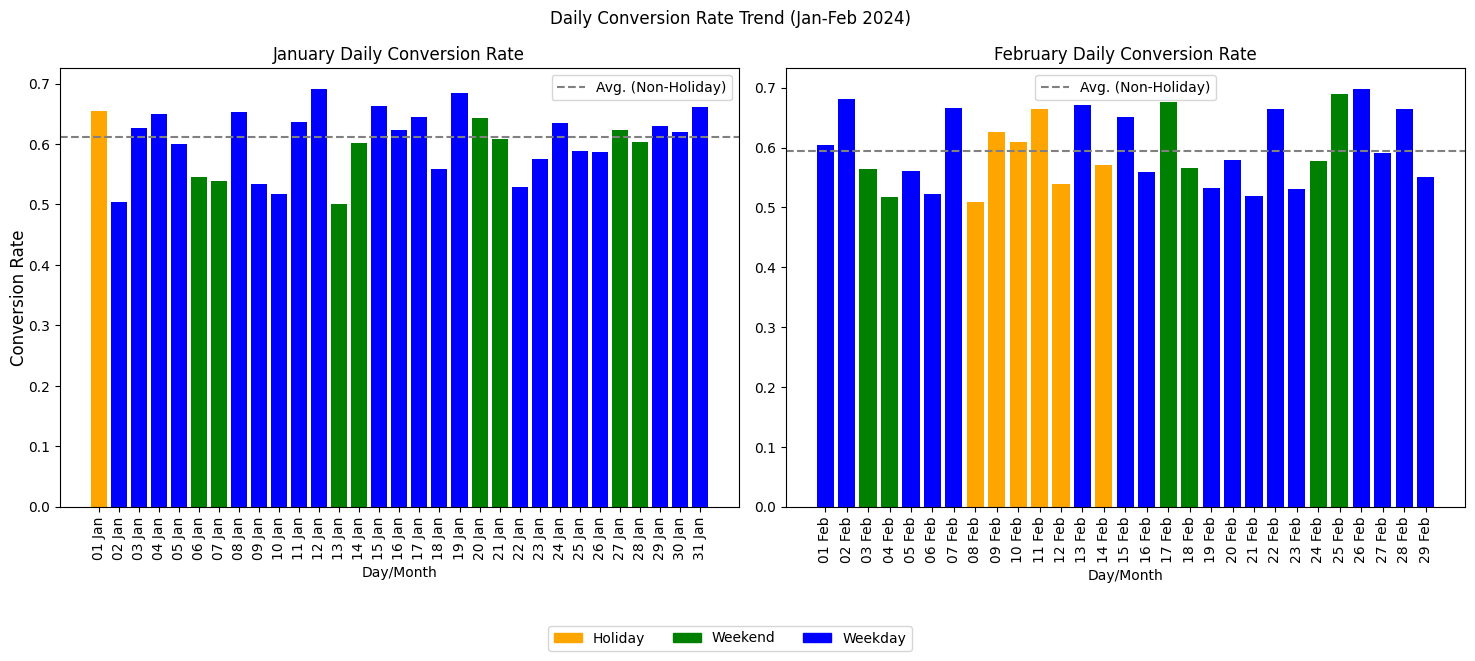

In [35]:
# ------------------------ Split Data & Calculate Averages ----------------

# Filter January data
jan_data = df[df['date'].dt.month == 1]
jan_holidays = holidays[holidays['date'].dt.month == 1]

# Calculate average conversion rate for non-holiday weekdays in January
jan_avg_conversion_rate = jan_data[~jan_data['date'].isin(jan_holidays) & (jan_data['date'].dt.dayofweek < 5)]['conversion_rate'].mean()

# Filter February data
feb_data = df[df['date'].dt.month == 2]
feb_holidays = holidays[holidays['date'].dt.month == 2]

# Calculate average conversion rate for non-holiday weekdays in February
feb_avg_conversion_rate = feb_data[~feb_data['date'].isin(feb_holidays) & (feb_data['date'].dt.dayofweek < 5)]['conversion_rate'].mean()

# ------------------------ Plotting ------------------------

# Create subplots for January & February
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# January Chart
jan_colors = jan_data['date'].apply(get_color)
ax1.bar(jan_data['date'], jan_data['conversion_rate'], color=jan_colors)
ax1.axhline(y=jan_avg_conversion_rate, color='gray', linestyle='--', label='Avg. (Non-Holiday)')
ax1.set_title('January Daily Conversion Rate')
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax1.legend()

# February Chart
feb_colors = feb_data['date'].apply(get_color)
ax2.bar(feb_data['date'], feb_data['conversion_rate'], color=feb_colors)
ax2.axhline(y=feb_avg_conversion_rate, color='gray', linestyle='--', label='Avg. (Non-Holiday)')
ax2.set_title('February Daily Conversion Rate')
ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax2.legend()

# ------------------------ X-axis Formatting ------------------------

def format_xaxis(ax,date_data):
    # Force one tick per bar, get positions, and align to center
    ax.set_xticks(date_data)  
    ax.xaxis.set_ticks_position('bottom')  

    # Set label format  and adjust layout
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d %b'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha='center')

# Apply formatting to both subplots
format_xaxis(ax1,jan_data['date'])
format_xaxis(ax2,feb_data['date'])


# ------------------------ Legend ------------------------

# Create custom legend elements
holiday_patch = mpatches.Patch(color='orange', label='Holiday')
weekend_patch = mpatches.Patch(color='green', label='Weekend')
weekday_patch = mpatches.Patch(color='blue', label='Weekday')

# Add the legend to the second subplot  
plt.figlegend(handles=[holiday_patch, weekend_patch, weekday_patch], 
              loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.1))  

# ------------------------ Axis Labels ------------------------

# Set y-axis label (common for both subplots)
fig.supylabel('Conversion Rate')

# Set x-axis labels for each subplot
ax1.set_xlabel('Day/Month')
ax2.set_xlabel('Day/Month')

# Show the plot
fig.suptitle('Daily Conversion Rate Trend (Jan-Feb 2024)', fontsize=12)
plt.tight_layout()
plt.show()